In [79]:
import pandas as pd

data = pd.read_csv('data/toxi-text-3M/train/multilingual-train-deduplicated.csv')

In [80]:
LOWER_BOUND = 100
HIGHER_BOUND = 1000

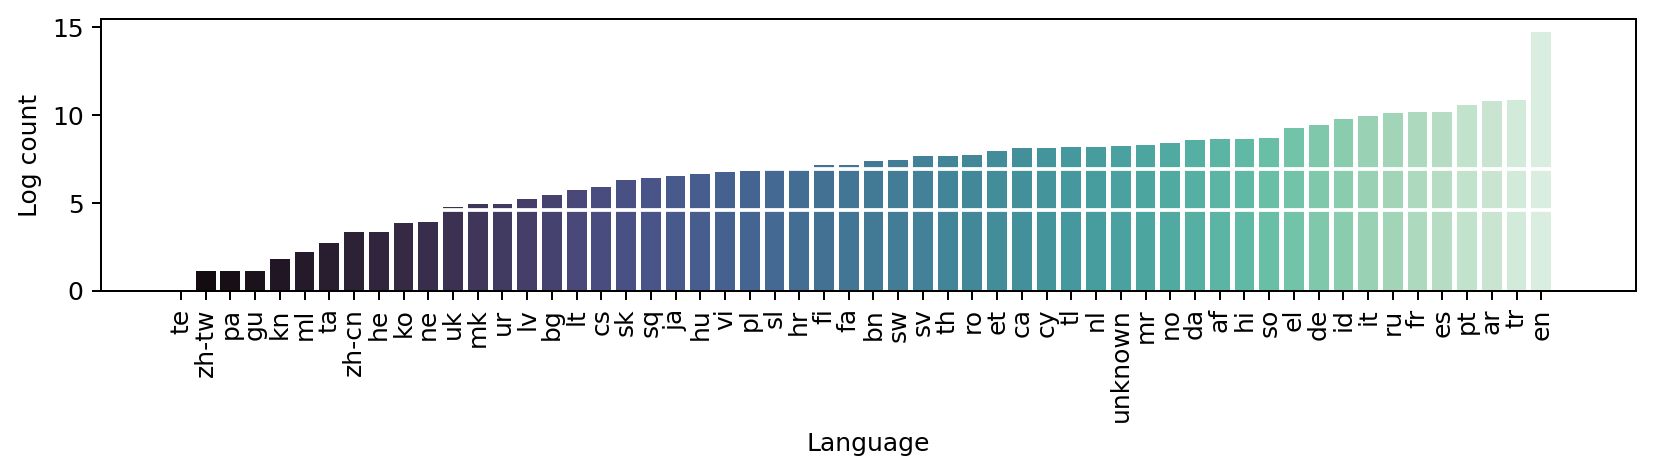

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

names, counts = np.unique(data['lang'], return_counts=True)
order = np.argsort(counts)
names, counts = names[order], counts[order]

plt.figure(figsize=(11,2), dpi=180)

ax = sns.barplot(x=names, y=np.log(counts), palette='mako')
plt.ylabel('Log count')
plt.xlabel('Language')
plt.xticks(rotation=90)
plt.hlines(np.log(LOWER_BOUND), xmin=0, xmax=len(names), color='white',)
plt.hlines(np.log(HIGHER_BOUND), xmin=0, xmax=len(names), color='white', )
plt.show()

In [82]:
data = data.groupby('lang').head(HIGHER_BOUND).reset_index(drop=True)
data.head()

,text,is_toxic,lang
0,"Saved lives, and spent for all of their childr...",0,en
1,"I agree with what you say, but for those worke...",0,en
2,My observation is there exists unequal share o...,0,en
3,Animal based fats are not what causes cardiova...,0,en
4,@GOPBlackChick @barrackobama just said u.s.was...,0,en


In [83]:
vc = data['lang'].value_counts()
vals_to_remove = vc[vc <= LOWER_BOUND].index.values
data['lang'].loc[data['lang'].isin(vals_to_remove)] = None
data = data.dropna()

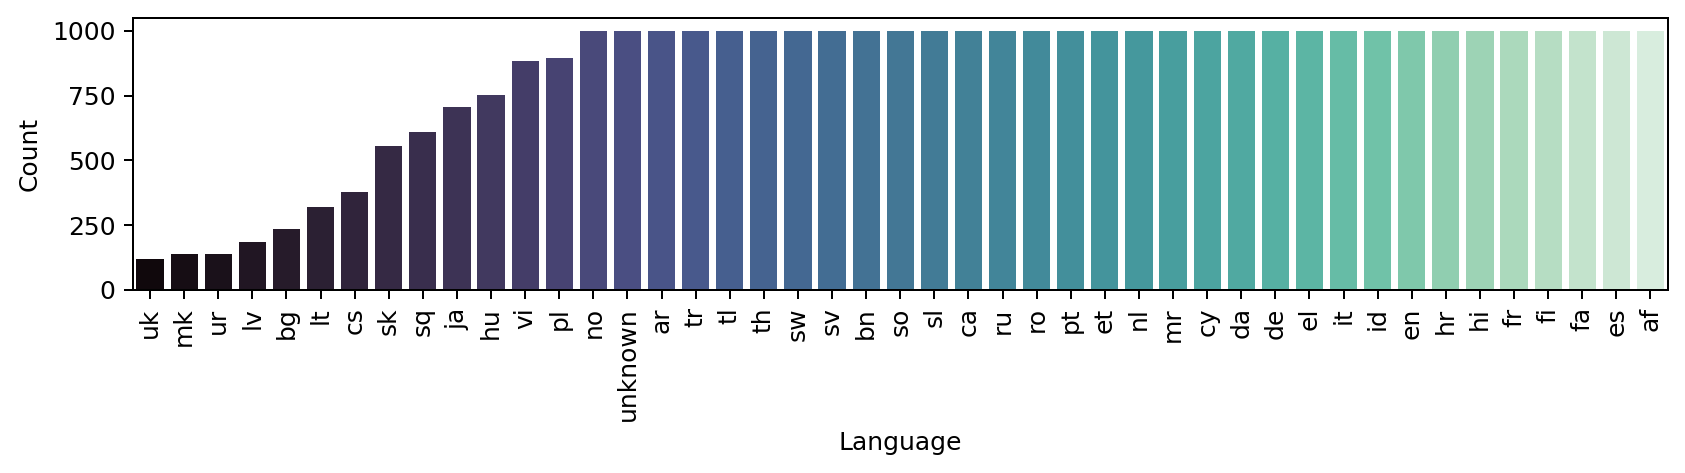

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

names, counts = np.unique(data['lang'], return_counts=True)
order = np.argsort(counts)
names, counts = names[order], counts[order]

plt.figure(figsize=(11,2), dpi=180)

ax = sns.barplot(x=names, y=counts, palette='mako')
plt.ylabel('Count')
plt.xlabel('Language')
plt.xticks(rotation=90)
plt.show()

In [85]:
data.to_parquet(f'data/toxi-text-3M/train_balanced/train_balanced_{LOWER_BOUND}_{HIGHER_BOUND}.parquet')